In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [2]:
# Пути к изображениям и меткам датасета Dental disease detection.

path_to_data_ts_img = "Dental_Caries_Detection.v2i.yolov5pytorch/test/images/"

ts_images_list = os.listdir(path_to_data_ts_img)

path_to_data_ts_lbl = "Dental_Caries_Detection.v2i.yolov5pytorch/test/labels/"

ts_labels_list = os.listdir(path_to_data_ts_lbl)

In [3]:
print(ts_images_list[:5])
print()
print(ts_labels_list[:5])

['010_00496_10_a091_jpg.rf.42dbd566edb518d718a49dd7fc89b90c.jpg', '010_00496_12_a091_jpg.rf.25e5a08b1132891cf173fd607ce488d3.jpg', '010_00506_06_a091_jpg.rf.0a49b33299193312f703cff581c4ade1.jpg', '010_00506_10_a091_jpg.rf.c139d94a3eb9ade61e267077e69e1157.jpg', '010_00508_06_a091_jpg.rf.0fefcc28d4dc78b03c2b6771c001ac12.jpg']

['010_00496_10_a091_jpg.rf.42dbd566edb518d718a49dd7fc89b90c.txt', '010_00496_12_a091_jpg.rf.25e5a08b1132891cf173fd607ce488d3.txt', '010_00506_06_a091_jpg.rf.0a49b33299193312f703cff581c4ade1.txt', '010_00506_10_a091_jpg.rf.c139d94a3eb9ade61e267077e69e1157.txt', '010_00508_06_a091_jpg.rf.0fefcc28d4dc78b03c2b6771c001ac12.txt']


In [4]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_ts_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "0":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("out_test_Dentasis_v30/" + image_name, img)
        plt.show()
    
    else:
        pass          

[128.5, 331.75, 38.0, 44.5]
[151.0, 283.75, 12.0, 13.5]


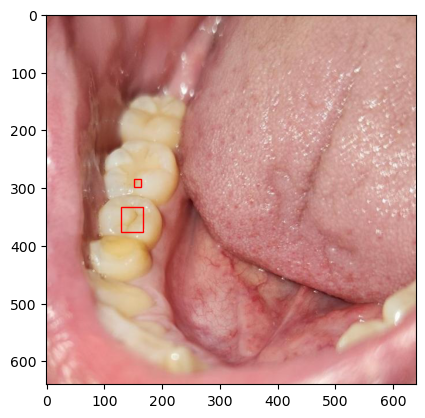

[347.75, 452.25, 26.5, 24.5]
[355.5, 419.25, 8.0, 8.5]
[352.75, 394.75, 7.5, 7.5]
[330.0, 357.5, 5.0, 5.0]
[326.0, 365.75, 5.0, 5.5]
[328.5, 374.25, 6.0, 5.5]


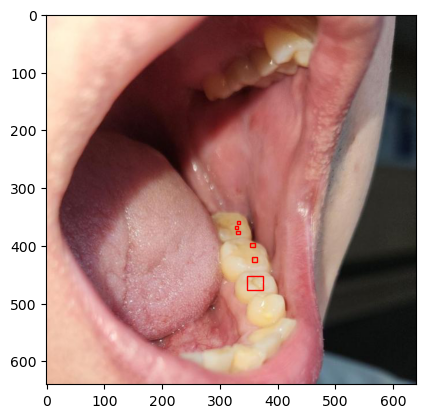

[563.75, 331.75, 10.5, 15.5]
[525.0, 395.0, 77.0, 44.0]
[51.25, 232.75, 46.5, 40.5]
[60.25, 284.5, 30.5, 30.0]
[517.0, 460.5, 23.0, 22.0]
[61.25, 338.75, 14.5, 12.5]
[550.25, 356.0, 11.5, 13.0]
[581.25, 376.5, 11.5, 17.0]


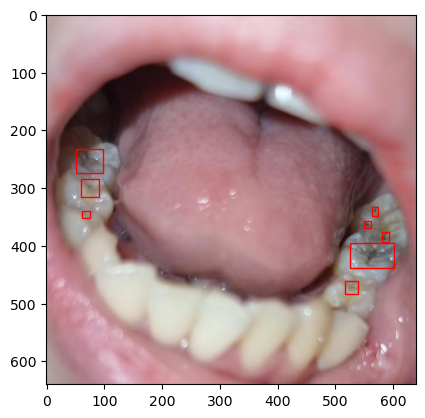

[273.0, 393.25, 16.0, 13.5]
[301.25, 361.25, 11.5, 14.5]
[264.0, 321.75, 8.0, 5.5]
[262.75, 352.5, 25.5, 14.0]
[273.75, 305.25, 21.5, 17.5]
[253.5, 277.25, 10.0, 5.5]
[283.5, 369.25, 7.0, 12.5]
[280.5, 332.0, 9.0, 9.0]


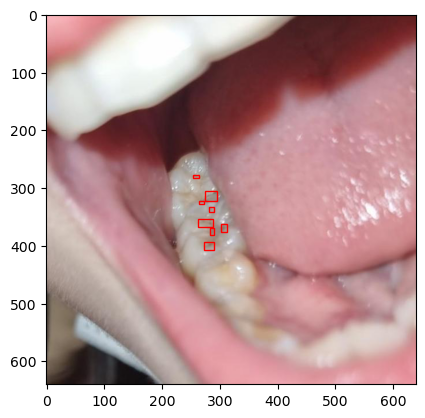

[425.0, 372.0, 23.0, 45.0]
[275.75, 474.25, 18.5, 22.5]


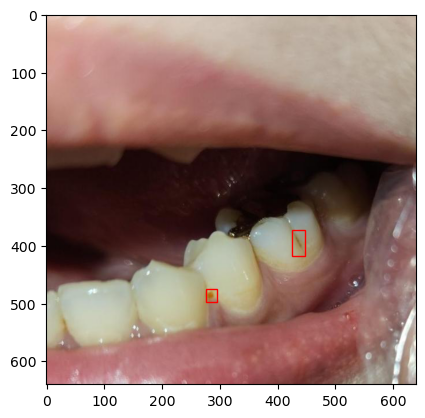

[134.0, 336.25, 27.0, 10.5]
[571.0, 222.25, 11.0, 6.5]
[535.5, 307.75, 18.0, 10.5]
[97.5, 248.75, 9.0, 9.5]
[585.0, 124.5, 15.0, 16.0]
[124.25, 300.75, 9.5, 7.5]


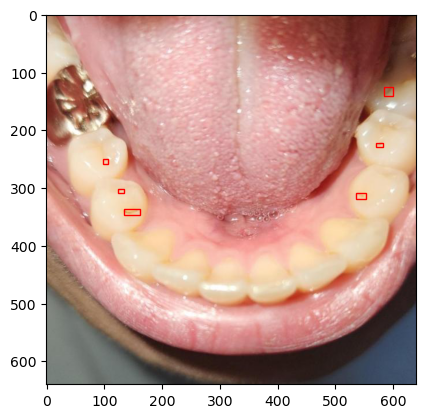

[461.75, 300.0, 17.5, 14.0]
[434.25, 249.75, 9.5, 7.5]
[391.75, 177.75, 8.5, 7.5]
[353.75, 194.5, 23.5, 17.0]
[399.25, 198.25, 7.5, 8.5]


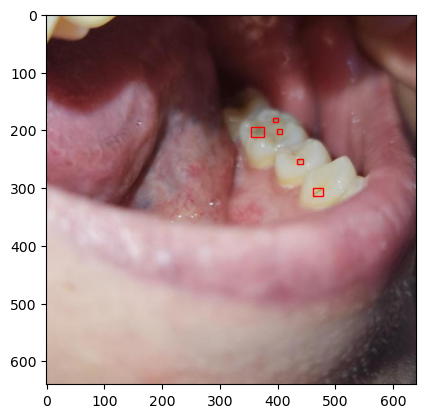

[143.5, 252.25, 17.0, 13.5]
[144.25, 290.75, 19.5, 12.5]
[139.5, 331.5, 18.0, 17.0]
[152.0, 213.75, 23.0, 15.5]
[170.25, 226.75, 14.5, 8.5]


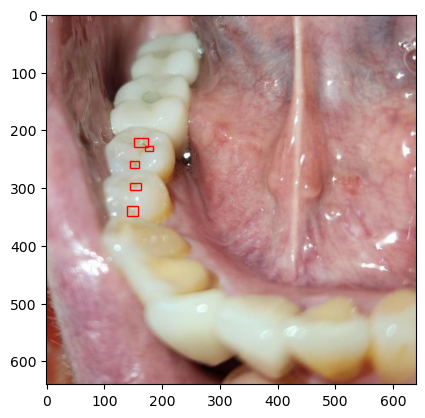

[45.5, 217.0, 46.0, 24.0]
[107.75, 333.25, 28.5, 24.5]
[147.75, 405.0, 20.5, 16.0]
[462.0, 378.75, 30.0, 14.5]
[482.25, 307.75, 28.5, 23.5]
[102.5, 369.5, 12.0, 12.0]
[79.75, 253.5, 49.5, 13.0]
[470.75, 411.5, 9.5, 11.0]


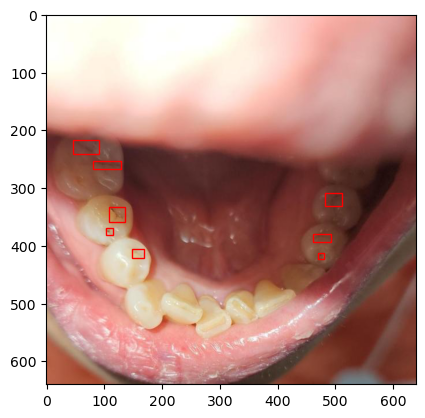

[371.75, 245.25, 10.5, 5.5]
[401.25, 317.0, 7.5, 4.0]
[406.75, 228.0, 13.5, 8.0]
[416.25, 275.0, 5.5, 4.0]
[404.25, 270.75, 6.5, 4.5]
[428.5, 269.5, 11.0, 11.0]
[413.0, 305.75, 6.0, 3.5]
[429.5, 333.5, 4.0, 3.0]
[426.25, 340.5, 3.5, 3.0]
[387.5, 353.25, 5.0, 3.5]
[410.5, 312.0, 3.0, 2.0]
[410.75, 314.25, 2.5, 2.5]
[411.0, 317.5, 6.0, 4.0]
[13.0, 371.0, 8.0, 9.0]
[437.5, 391.5, 7.0, 5.0]


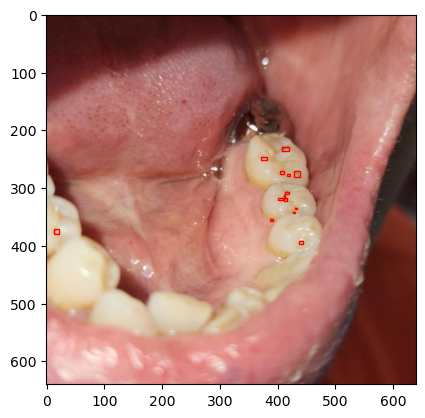

[371.25, 98.0, 49.5, 32.0]
[440.25, 148.75, 39.5, 39.5]
[458.75, 227.0, 18.5, 14.0]
[450.75, 277.5, 15.5, 19.0]
[462.25, 248.0, 14.5, 14.0]
[466.5, 196.25, 8.0, 8.5]
[453.25, 192.5, 9.5, 9.0]
[440.25, 188.25, 7.5, 6.5]


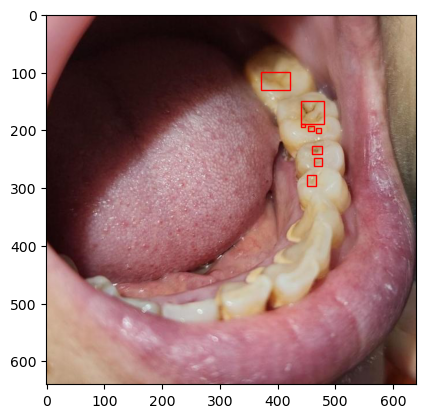

[279.5, 308.75, 19.0, 16.5]
[291.25, 453.75, 17.5, 21.5]


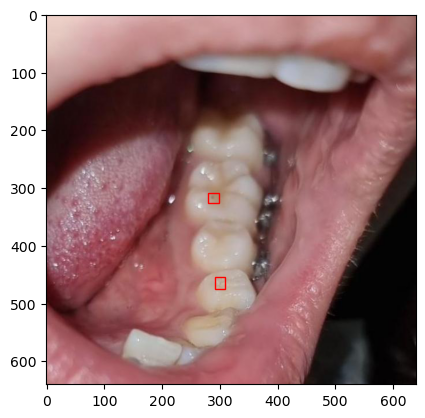

[146.25, 337.75, 9.5, 8.5]
[152.0, 374.0, 16.0, 13.0]
[521.5, 363.25, 19.0, 13.5]
[499.0, 396.25, 15.0, 11.5]


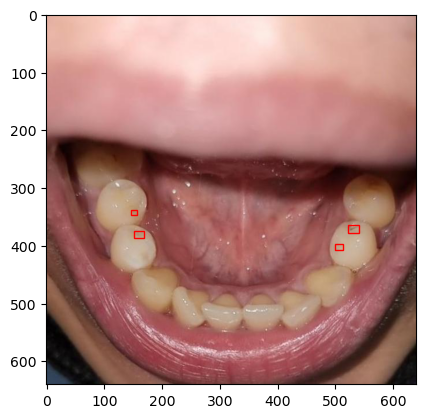

[273.5, 525.5, 31.0, 38.0]
[334.75, 512.25, 17.5, 20.5]
[311.75, 543.25, 18.5, 18.5]


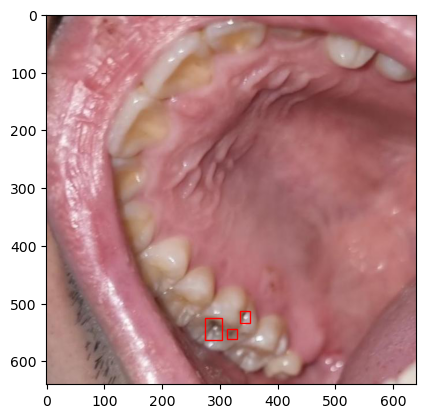

[404.0, 326.75, 34.0, 26.5]
[329.0, 419.0, 59.0, 42.0]
[281.0, 474.25, 63.0, 30.5]
[379.25, 373.5, 32.5, 30.0]
[413.0, 138.5, 14.0, 16.0]
[303.0, 415.0, 16.0, 19.0]


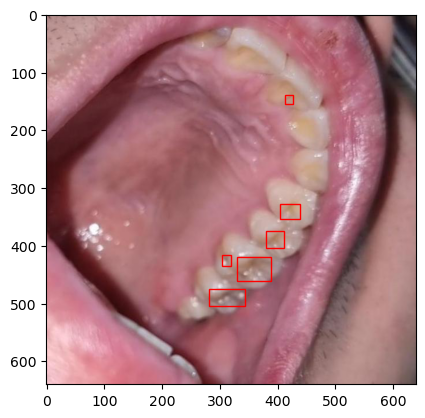

[263.0, 434.5, 49.0, 56.0]
[239.5, 385.25, 39.0, 41.5]
[313.0, 491.25, 29.0, 40.5]
[619.0, 52.5, 19.0, 25.0]


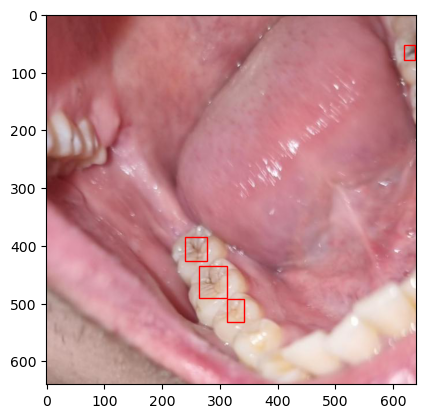

[104.25, 365.0, 35.5, 30.0]
[71.5, 296.5, 44.0, 49.0]
[562.75, 220.0, 31.5, 24.0]
[104.75, 409.0, 28.5, 24.0]
[488.5, 405.5, 21.0, 22.0]


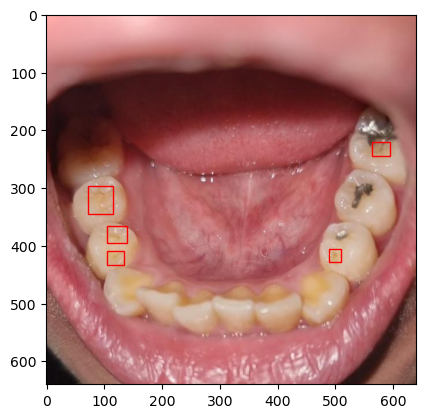

[373.0, 323.25, 31.0, 63.5]
[279.5, 287.75, 17.0, 68.5]


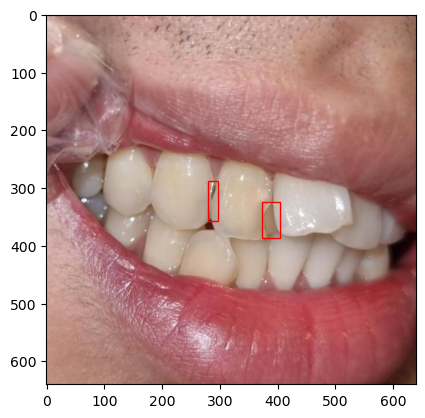

[147.0, 220.25, 19.0, 83.5]
[212.75, 275.5, 20.5, 44.0]


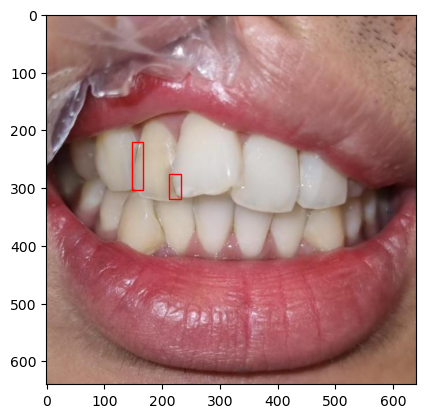

[568.75, 231.0, 68.5, 61.0]


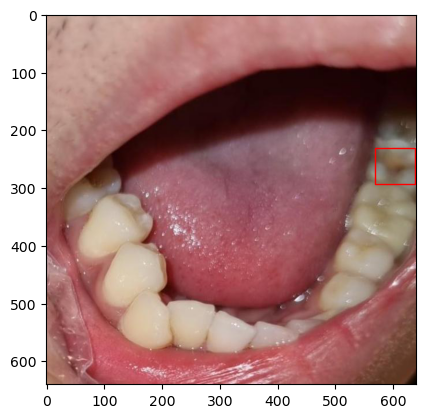

[227.0, 327.25, 46.0, 47.5]
[255.0, 275.25, 54.0, 33.5]
[241.25, 273.5, 10.5, 9.0]


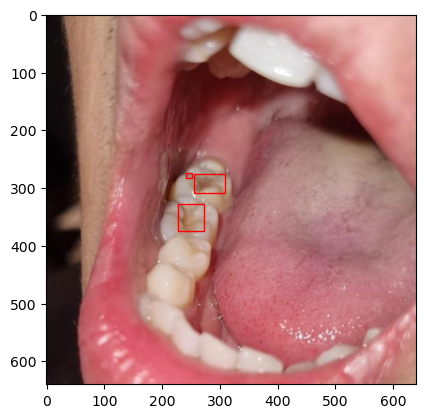

[419.0, 266.0, 52.0, 38.0]


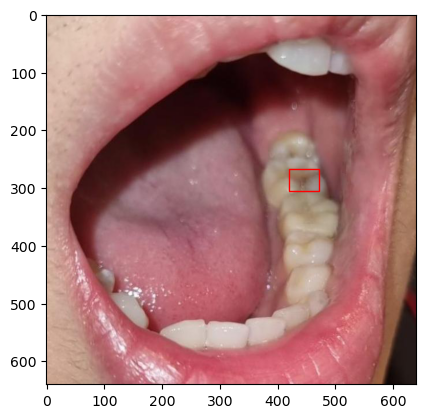

[225.5, 417.5, 22.0, 14.0]


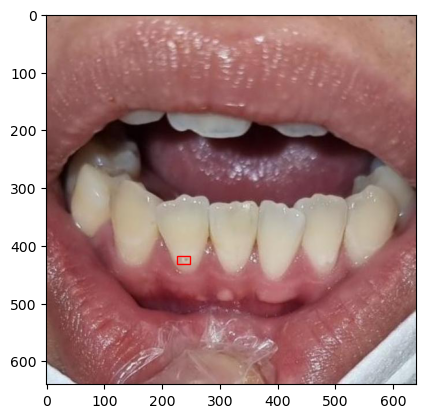

[26.5, 88.5, 56.0, 32.0]
[553.25, 316.25, 32.5, 18.5]
[58.25, 130.0, 15.5, 15.0]
[43.0, 140.5, 11.0, 13.0]
[39.0, 161.25, 9.0, 12.5]


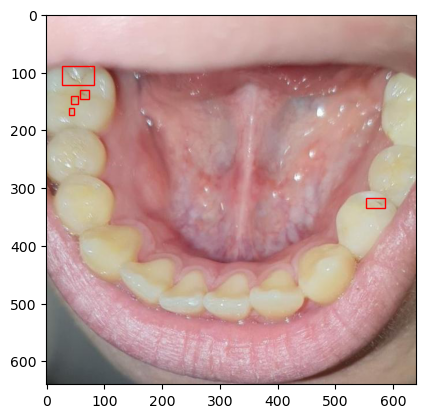

[510.75, 481.5, 23.5, 16.0]
[515.5, 260.5, 10.0, 21.0]


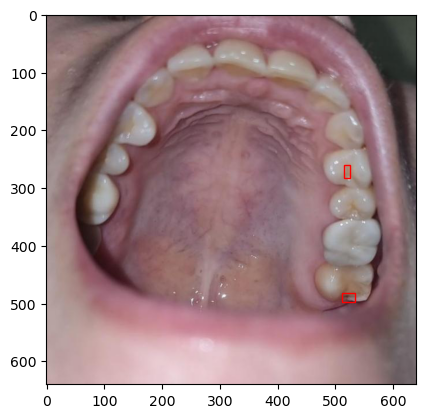

[497.25, 402.0, 13.5, 17.0]
[529.0, 294.5, 34.0, 31.0]
[36.25, 266.25, 21.5, 18.5]
[518.75, 378.0, 15.5, 17.0]


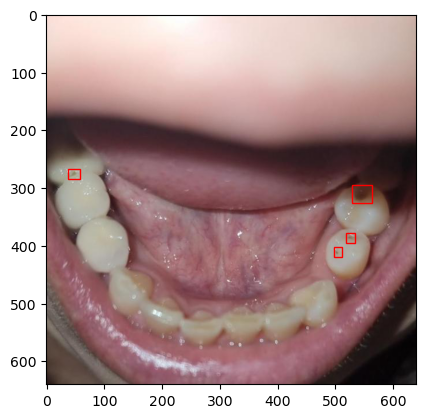

[482.0, 149.75, 58.0, 53.5]
[463.0, 334.25, 31.0, 23.5]
[460.5, 406.0, 35.0, 15.0]
[447.0, 428.0, 15.0, 14.0]


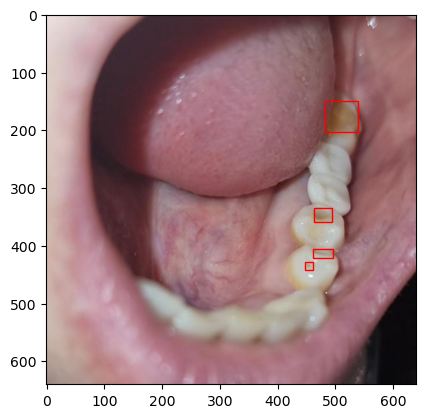

[100.0, 374.25, 13.0, 17.5]


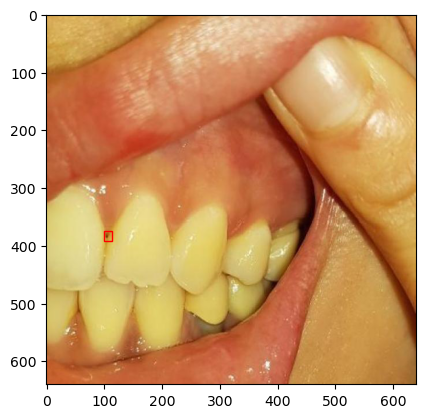

[385.75, 401.75, 11.5, 16.5]


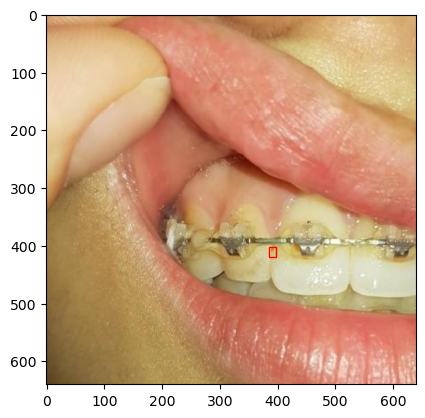

[240.5, 324.25, 16.0, 20.5]
[272.0, 275.75, 48.0, 36.5]
[215.75, 338.5, 19.5, 16.0]
[196.75, 358.75, 9.5, 14.5]
[170.0, 375.75, 16.0, 14.5]
[250.0, 264.75, 23.0, 16.5]


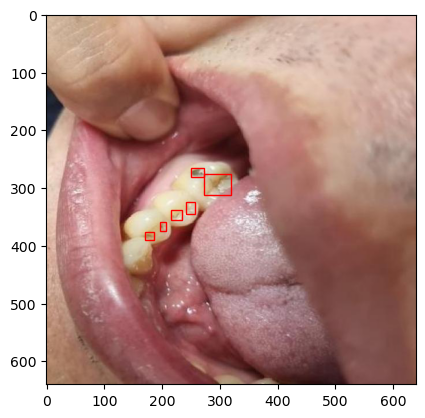

[478.0, 370.5, 21.0, 18.0]
[476.25, 409.75, 11.5, 12.5]


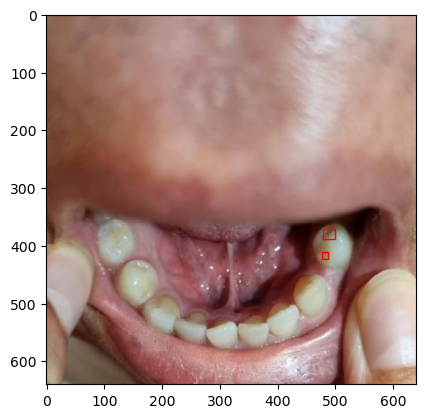

In [5]:
# Пройдемся по всем файлам с разметкой.
# Изображения могут иметь разный формат, это тоже учтём.

for file_name in ts_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in ts_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in ts_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_ts_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_ts_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    